In [1]:
from pathlib import Path

from experiment import Experiment
from utils.stat_utils import stats_to_distribution, generate_discrete_distribution, qq_plot
from utils.data_utils import input_data_to_df, output_data_to_df


In [2]:
notebooks_path = Path('data/out/notebooks_1k')
scripts_path = Path('data/out/scripts_1k')

e = Experiment(
    notebooks_folder=notebooks_path,
    scripts_folder=scripts_path,
    max_num=1_000
)

min_clone_length, max_clone_length = 3, 90
e.run(normalize=False, drop_breaks=False, length_range=range(3, max_clone_length + 1))



999it [00:00, 1377.56it/s]
955it [00:00, 1361.93it/s]


In [3]:
xk_n, pk_n = stats_to_distribution(e.aggregated_stats.get('notebooks'))
xk_s, pk_s = stats_to_distribution(e.aggregated_stats.get('scripts'))

dist_notebooks = generate_discrete_distribution(xk_n, pk_n)
dist_scripts = generate_discrete_distribution(xk_s, pk_s)


0.97-Quantile of scripts distribution is 45
0.97-Quantile of notebooks distribution is 64


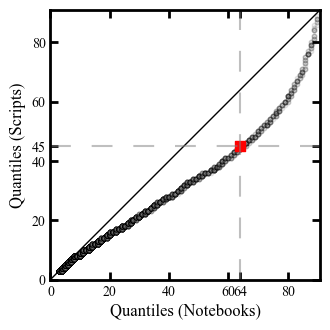

In [4]:
qq_plot(dist_n=dist_notebooks, dist_s=dist_scripts, save_path=Path('figures/'))


# Data Example

# Input data

In [5]:
input_ntb_df = input_data_to_df(Path('data/in/notebooks_1k'))
input_ntb_df.head()


,name,content
0,3582eeba6798c34dc5b59e6ccbc28eaf1b4d40d4.ipynb.py,import xarray as xr\nimport xclim as xc\n# [__...
1,6602a6d2422e55f1ab4f2395d04e22ad2eaa9bd3.ipynb.py,"%matplotlib inline\nimport sys, os\nimport cop..."
2,640cf9e76c5d4524ecdf43e1c7174335827ebee0.ipynb.py,"iplot(gen_rabi_elem(tau=500e-9, mw_amp=1.5, mw..."
3,702dce9b726b46301a7f2861c4a346c8b1178048.ipynb.py,import hatchet as ht\n# [___CELL_SEPARATOR___]...
4,e012924ca6264514748d3e415f0af6e3e123f968.ipynb.py,"#linear_model.LarsCV([fit_intercept, …]) \n\nf..."


In [6]:
print(input_ntb_df.content.iloc[0])


import xarray as xr
import xclim as xc
# [___CELL_SEPARATOR___]
tasmax = xr.tutorial.open_dataset('air_temperature').air.resample(time='D').max(keep_attrs=True)
tasmax = tasmax.where(tasmax.time.dt.day % 10 != 0)
# [___CELL_SEPARATOR___]
tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
# [___CELL_SEPARATOR___]
xc.set_options(cf_compliance='log')

tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
# [___CELL_SEPARATOR___]
xc.set_options(check_missing='pct', missing_options={'pct': {'tolerance': 0.08}})

tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
tx_mean.sel(time='2013', lat=75, lon=200)
# [___CELL_SEPARATOR___]
with xc.set_options(check_missing="wmo"):
    tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
tx_mean.sel(time='2013', lat=75, lon=200)
# [___CELL_SEPARATOR___]
from xclim.core.missing import register_missing_method
from xclim.core.missing impor

# Output data

In [7]:
output_ntb_df = output_data_to_df(Path('data/out/notebooks_1k'))
output_ntb_df.head()


,totalGroups,totalClones,groups,name
0,35,102,"[{'clone_length': 14, 'clones': [{'psi': '[Psi...",537f25f0f5d7e58d0fd2ae40c55dbae47771081a#537f2...
1,15,38,"[{'clone_length': 2, 'clones': [{'psi': '[PsiE...",5f835d1ac0fed0728bb12c5d4cee65df81fa57a5#5f835...
2,3,11,"[{'clone_length': 3, 'clones': [{'psi': '[PsiE...",79467a65bdda2bbbe6a878cca4447f5038d5c903#79467...
3,184,589,"[{'clone_length': 3, 'clones': [{'psi': '[PsiE...",745ae92a5cdf72e2a75fcf4f09c1b1d52824923b#745ae...
4,0,0,[],c38feb09d567b2f76802c58199a82b4776c0be3d#c38fe...


In [8]:
output_ntb_df.groups.iloc[0][0]['clones'][0]


{'psi': '[PsiElement(Py:IDENTIFIER), PsiElement(Py:EQ), PsiElement(Py:IDENTIFIER), PsiElement(Py:DOT), PsiElement(Py:IDENTIFIER), PsiElement(Py:LPAR), PsiElement(Py:IDENTIFIER), PsiElement(Py:EQ), PsiElement(Py:INTEGER_LITERAL), PsiElement(Py:RPAR), PsiElement(Py:RPAR), PsiElement(Py:IDENTIFIER), PsiElement(Py:LPAR), PsiElement(Py:IDENTIFIER)]',
 'text': 'options=Optim.Options(iterations=10))\nprint(o',
 'position': [2848, 2892]}